##### <font color=#A0A0A0>
##### ════════════════════════════════════════════════════════
#####     🦾🤖 **CREATING A NEURAL NETWORK FROM SCRATCH**
##### ════════════════════════════════════════════════════════ </font>

#### 🎯 Project Objetive
Training on the CIFAR-10 and Jena Climate datasets to achieve better performance, with higher accuracy and lower loss.

#### 🔎 Data inspection

In [74]:
#import used pakages and datasets
from tensorflow import keras
from  keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [75]:
x_train.shape

(50000, 32, 32, 3)

In [76]:
x_test.shape

(10000, 32, 32, 3)

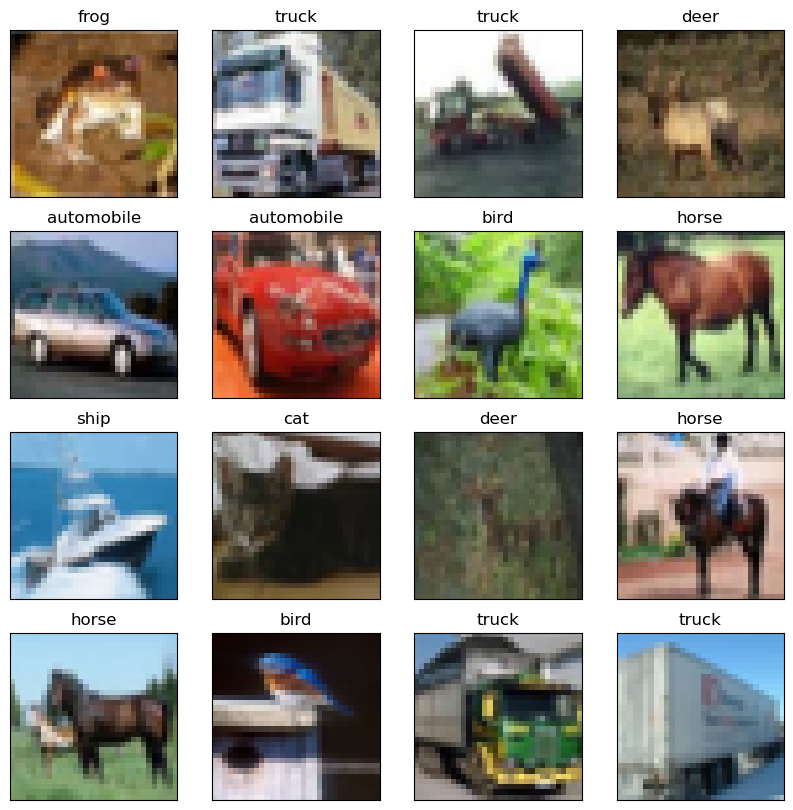

In [77]:
#General overwiew of the dataset
import matplotlib.pyplot as plt

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
plt.show()

(-0.5, 31.5, 31.5, -0.5)

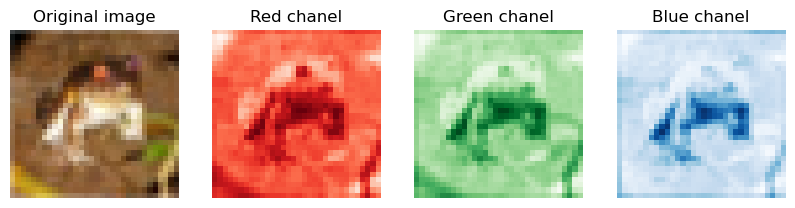

In [78]:
#Visualizing the chanels of the image
image = x_train[0]
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

plt.figure(figsize=(10,5))

plt.subplot(1,4,1)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(R, cmap='Reds')
plt.title('Red chanel')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(G, cmap='Greens')
plt.title('Green chanel')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(B, cmap='Blues')
plt.title('Blue chanel')
plt.axis('off')

In [79]:
from keras import layers
inputs = keras.Input(shape=(32,32,3))
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_cifar1 = keras.Model(inputs=inputs, outputs=outputs)

In [80]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [82]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_cifar10.keras',
        save_best_only = True,
        monitor = 'val_loss'
    )]


model_cifar1.compile(optimizer='rmsprop',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
history_cifar1 = model_cifar1.fit(x_train, y_train, 
                                  epochs=30, 
                                  validation_data=(x_val,y_val),
                                  callbacks=callbacks)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4822 - loss: 1.4670 - val_accuracy: 0.5697 - val_loss: 1.2294
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6134 - loss: 1.1074 - val_accuracy: 0.6139 - val_loss: 1.1196
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6707 - loss: 0.9462 - val_accuracy: 0.6489 - val_loss: 1.0472
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7104 - loss: 0.8312 - val_accuracy: 0.6484 - val_loss: 1.0544
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7438 - loss: 0.7343 - val_accuracy: 0.6480 - val_loss: 1.1309
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7707 - loss: 0.6522 - val_accuracy: 0.6671 - val_loss: 1.0749
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7977 - loss: 0.5782 - val_accuracy: 0.6635 - val_loss: 1.1290
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8208 - loss: 0.5117 -

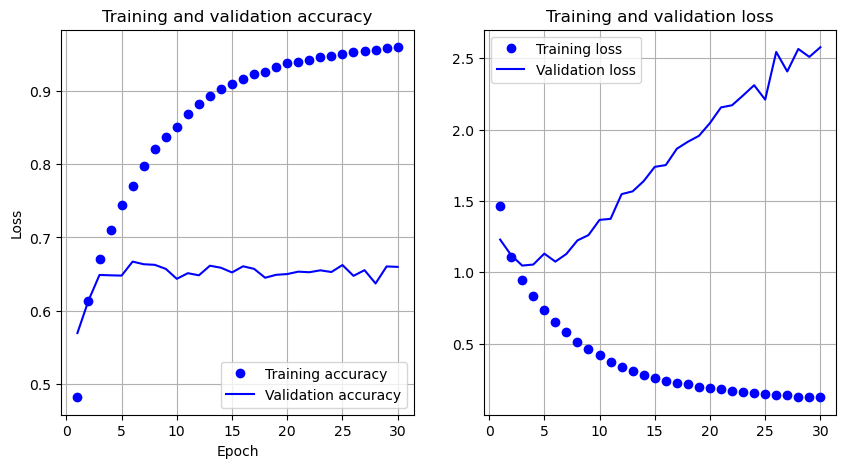

In [83]:
accuracy_cifar1 = history_cifar1.history['accuracy']
val_accuracy_cifar1 = history_cifar1.history['val_accuracy']
loss_cifar1 = history_cifar1.history['loss']
val_loss_cifar1 = history_cifar1.history['val_loss']
epochs = range(1, len(val_accuracy_cifar1) + 1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(epochs, accuracy_cifar1, 'bo', label='Training accuracy')
ax1.plot(epochs, val_accuracy_cifar1, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, loss_cifar1, 'bo', label='Training loss')
ax2.plot(epochs, val_loss_cifar1, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()

In [88]:
test_model = keras.models.load_model('convnet_cifar10.keras')
test_loss, test_acc = test_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6473 - loss: 1.0309
Test accuracy: 0.647


There is a clear problem of overfitting with the training accuracy reaching 95% while the validation accuracy drops to 64%. The same pattern is observed with the loss: after reaching a low point around the fifth epoch, it increases rapidly, which is a clear sign of overfitting.  
  
To reduce the overfitting thecniques like data augmentation and dropout could be used to reduce this.

In [89]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
from keras import layers
inputs = keras.Input(shape=(32,32,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_cifar2 = keras.Model(inputs=inputs, outputs=outputs)

model_cifar2.compile(optimizer='rmsprop',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_cifar2.keras',
        save_best_only=True,
        monitor='val_loss'
    )
]
history_cifar2 = model_cifar2.fit(x_train, y_train,
                           epochs=80,
                           validation_data=(x_val, y_val),
                           callbacks=callbacks)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3192 - loss: 1.9519 - val_accuracy: 0.4324 - val_loss: 1.5619
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4286 - loss: 1.6240 - val_accuracy: 0.4805 - val_loss: 1.4849
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4657 - loss: 1.5272 - val_accuracy: 0.5353 - val_loss: 1.3228
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4906 - loss: 1.4669 - val_accuracy: 0.5504 - val_loss: 1.2708
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5037 - loss: 1.4308 - val_accuracy: 0.5492 - val_loss: 1.3078
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5247 - loss: 1.3883 - val_accuracy: 0.5746 - val_loss: 1.2113
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5343 - loss: 1.3486 - val_accuracy: 0.5974 - val_loss: 1.1518
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5517 - loss: 1.

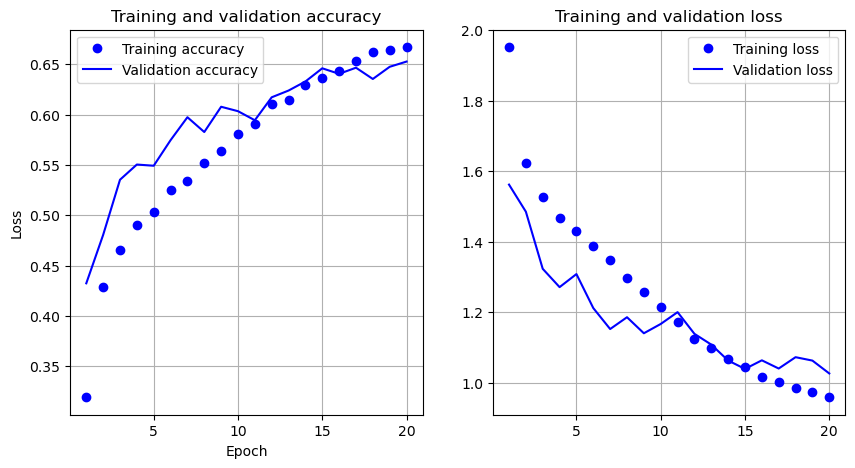

In [99]:
accuracy_cifar2 = history_cifar2.history['accuracy']
val_accuracy_cifar2 = history_cifar2.history['val_accuracy']
loss_cifar2 = history_cifar2.history['loss']
val_loss_cifar2 = history_cifar2.history['val_loss']
epochs = range(1, len(val_accuracy_cifar2) + 1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(epochs, accuracy_cifar2, 'bo', label='Training accuracy')
ax1.plot(epochs, val_accuracy_cifar2, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, loss_cifar2, 'bo', label='Training loss')
ax2.plot(epochs, val_loss_cifar2, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()

In [104]:
test_model2 = keras.models.load_model(
    'convnet_cifar10.keras')
test_loss2, test_acc2 = test_model2.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc2:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6473 - loss: 1.0309
Test accuracy: 0.647


#### <font color=#A0A0A0> **🔘 Selection of hyperparameters**</font>

#### <font color=#A0A0A0> **🧪 Testing the network with another data set**</font>

#### <font color=#A0A0A0> **🧐 Performance Summary**</font>

#### <font color=#A0A0A0> **🧐✅ Conclusions**</font>